In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

# Steps in analysis/ model building


1. Read and visualise data (EDA)
2. Prepare data for model training
3. Split into test-train data
4. Modelling
5. Check model parameters
6. Test model on test data

# Read data

In [2]:
lead = pd.read_csv ('/Users/noopurjoshi/Documents/DATA Science/Machine Learning/Lead Scoring Assignment/Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Preparation

#### Treatment of null values

In [6]:
lead.isna().sum()/lead.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
lead = lead.drop (['Asymmetrique Profile Index', 
                   'Asymmetrique Activity Score', 
                   'Asymmetrique Profile Score'],
                 axis = 1)

In [8]:
lead['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [9]:
# imputing all null values to 'Low' as they are unknown we can safely consider them as low index

lead['Asymmetrique Activity Index']= lead['Asymmetrique Activity Index'].fillna('03.Low')

In [10]:
# Converting categorical variable to numeric -> high = 1, medium = 2, low = 3

lead['Asymmetrique Activity Index'] = lead['Asymmetrique Activity Index'].apply(lambda x: 1 if x =='01.High' else 2 if x == '02.Medium' else 3)

In [11]:
lead['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [12]:
lead['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [13]:
lead['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [14]:
lead.loc[lead['Lead Profile']== 'Select', 'Lead Profile'] = np.nan

In [15]:
lead['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [16]:
lead.loc[lead['City']== 'Select', 'City'] = np.nan

In [17]:
lead['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [18]:
lead.loc[lead['Country']== 'unknown', 'Country'] = np.nan

In [19]:
lead['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [20]:
lead.loc[lead['Specialization']== 'Select', 'Specialization'] = np.nan

In [21]:
lead['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [22]:
lead.loc[lead['How did you hear about X Education']== 'Select', 
                'How did you hear about X Education'] = np.nan

In [23]:
lead['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [24]:
lead['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [25]:
col_list = lead.isna().sum()/lead.shape[0]*100
col_list = col_list[col_list>=15]
col_list = col_list.index.tolist()
col_list

['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City']

In [26]:
# Imputing null values to 'Unknown'

for i in col_list:
    lead[i]= lead[i].fillna('Unknown')

In [27]:
# columns with less than 5% null values

cols = lead.isna().sum()/lead.shape[0]*100
cols = cols[(cols<=5) & (cols>0)]
cols = cols.index.tolist()
cols

['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']

In [28]:
# delete rows with null values in these columns

for i in cols:
    lead.dropna (subset = [i], inplace = True)

In [29]:
lead.shape

(9074, 34)

lead.isna().sum()

In [30]:
lead.loc[lead['How did you hear about X Education']== 'Select', 'How did you hear about X Education'] = np.nan

### Univariate Analysis

In [31]:
column_list = lead.columns.tolist()
column_list

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

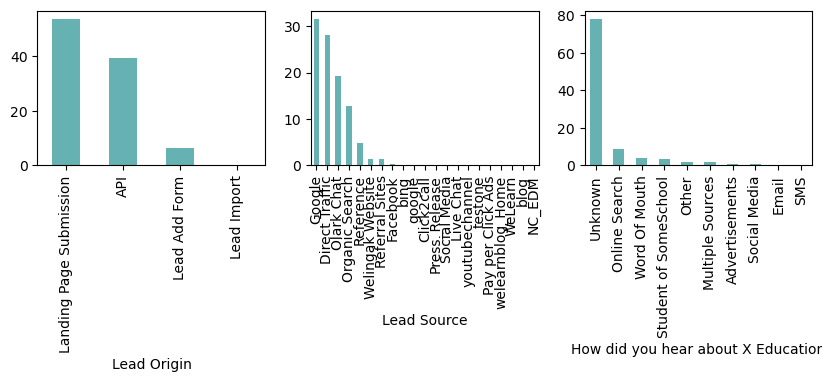

In [32]:
# Marketing related variables 

plt.figure(figsize = [10,2])
color = [0, 0.5, 0.5, 0.6]

plt.subplot(1,3,1)
(100*lead['Lead Origin'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(1,3,2)
(100*lead['Lead Source'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(1,3,3)
(100*lead['How did you hear about X Education'].value_counts(normalize = True)).plot.bar(color = color)

plt.show()

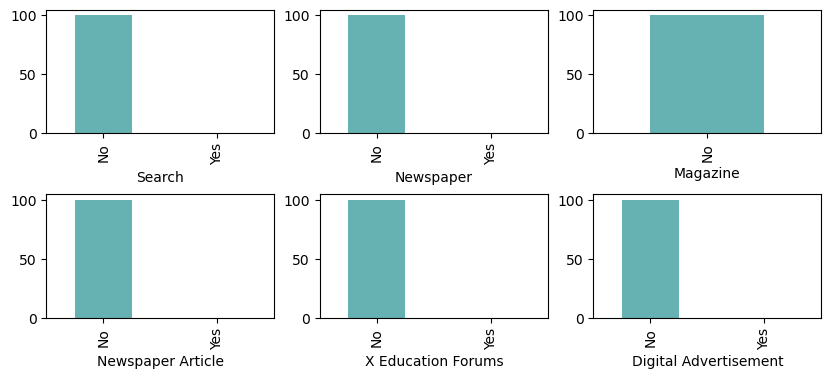

In [33]:
# Marketing related variables 

plt.figure(figsize = [10,4])
plt.subplots_adjust(hspace=0.5)
color = [0, 0.5, 0.5, 0.6]

plt.subplot(2,3,1)
(100*lead['Search'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(2,3,2)
(100*lead['Newspaper'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(2,3,3)
(100*lead['Magazine'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(2,3,4)
(100*lead['Newspaper Article'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(2,3,5)
(100*lead['X Education Forums'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(2,3,6)
(100*lead['Digital Advertisement'].value_counts(normalize = True)).plot.bar(color = color)

plt.show()

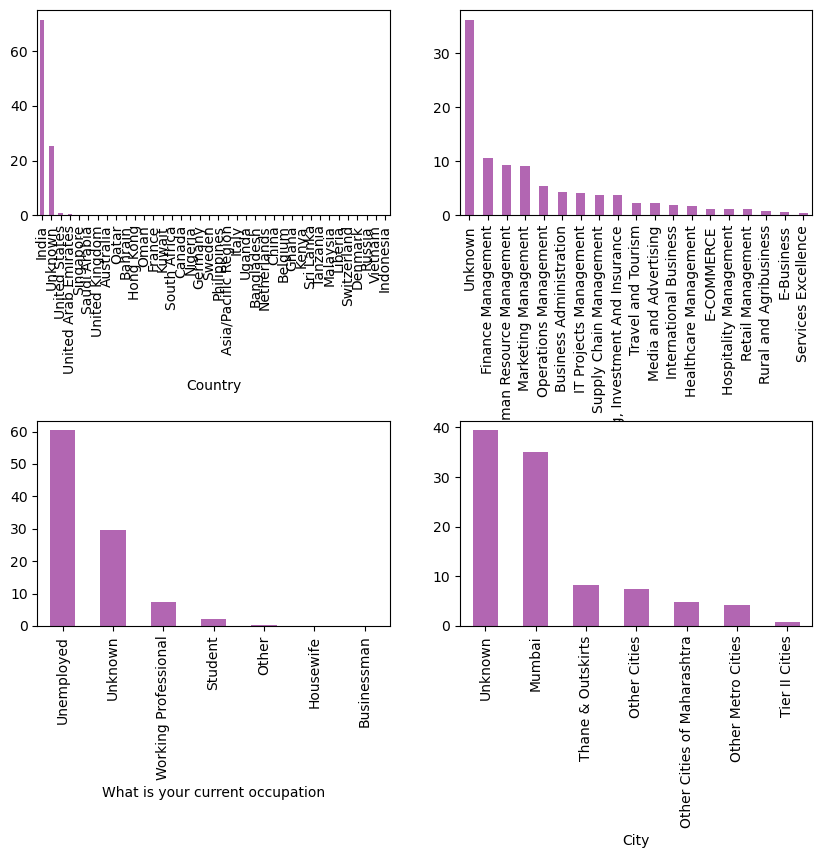

In [34]:
# Personal info

plt.figure(figsize = [10,8])
plt.subplots_adjust(hspace=1)
color = [0.5, 0, 0.5, 0.6]

plt.subplot(2,2,1)
(100*lead['Country'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(2,2,2)
(100*lead['Specialization'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(2,2,3)
(100*lead['What is your current occupation'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(2,2,4)
(100*lead['City'].value_counts(normalize = True)).plot.bar(color = color)

plt.show()

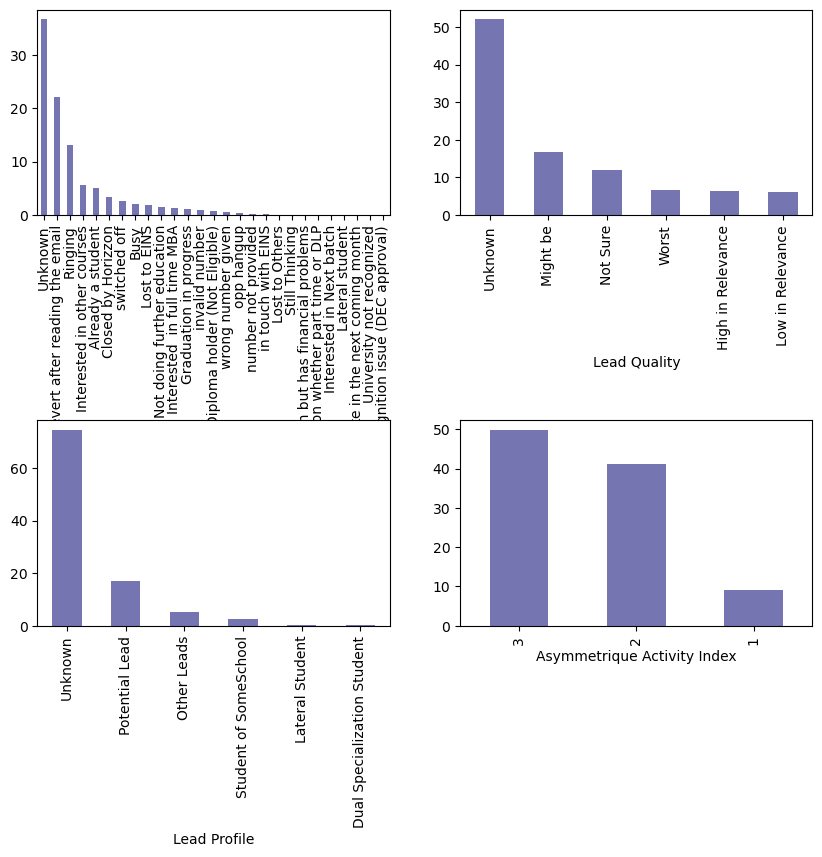

In [35]:
# Lead perception by company

plt.figure(figsize = [10,8])
plt.subplots_adjust(hspace=1)
color = [0.1, 0.1, 0.5, 0.6]

plt.subplot(2,2,1)
(100*lead['Tags'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(2,2,2)
(100*lead['Lead Quality'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(2,2,3)
(100*lead['Lead Profile'].value_counts(normalize = True)).plot.bar(color = color)

plt.subplot(2,2,4)
(100*lead['Asymmetrique Activity Index'].value_counts(normalize = True)).plot.bar(color = color)

plt.show()

### Bivariate Analysis (with target - conversion)

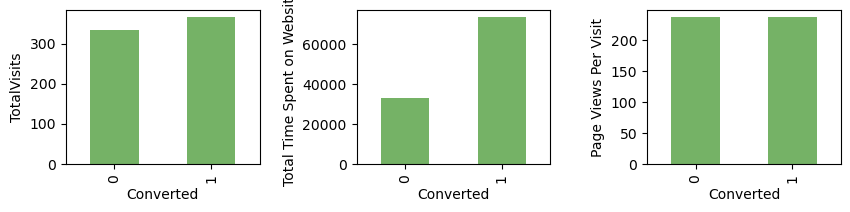

In [36]:
# Numeric variables

plt.figure(figsize = [10,2])
plt.subplots_adjust(wspace=0.5)
color = [0.1, 0.5, 0, 0.6]

plt.subplot(1,3,1)
(100* lead.groupby(lead['Converted'])['TotalVisits'].mean()).plot.bar(color = color)
plt.ylabel('TotalVisits')

plt.subplot(1,3,2)
(100* lead.groupby(lead['Converted'])['Total Time Spent on Website'].mean()).plot.bar(color = color)
plt.ylabel('Total Time Spent on Website')

plt.subplot(1,3,3)
(100* lead.groupby(lead['Converted'])['Page Views Per Visit'].mean()).plot.bar(color = color)
plt.ylabel('Page Views Per Visit')

plt.show()

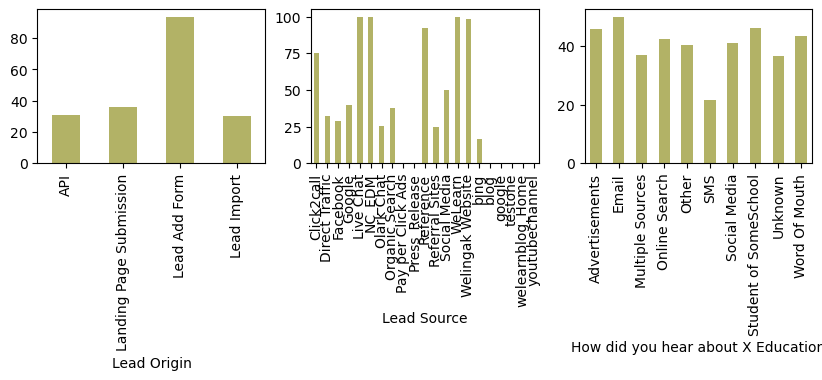

In [37]:
# Marketing related variables 

plt.figure(figsize = [10,2])
color = [0.5, 0.5, 0, 0.6]

plt.subplot(1,3,1)
(100* lead.groupby(lead['Lead Origin'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(1,3,2)
(100* lead.groupby(lead['Lead Source'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(1,3,3)
(100* lead.groupby(lead['How did you hear about X Education'])['Converted'].mean()).plot.bar(color = color)

plt.show()

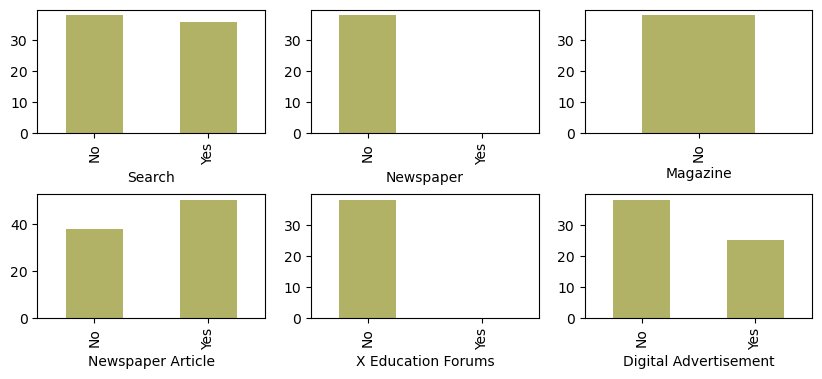

In [38]:
# Marketing related variables 

plt.figure(figsize = [10,4])
plt.subplots_adjust(hspace=0.5)
color = [0.5, 0.5, 0, 0.6]

plt.subplot(2,3,1)
(100* lead.groupby(lead['Search'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(2,3,2)
(100* lead.groupby(lead['Newspaper'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(2,3,3)
(100* lead.groupby(lead['Magazine'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(2,3,4)
(100* lead.groupby(lead['Newspaper Article'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(2,3,5)
(100* lead.groupby(lead['X Education Forums'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(2,3,6)
(100* lead.groupby(lead['Digital Advertisement'])['Converted'].mean()).plot.bar(color = color)

plt.show()

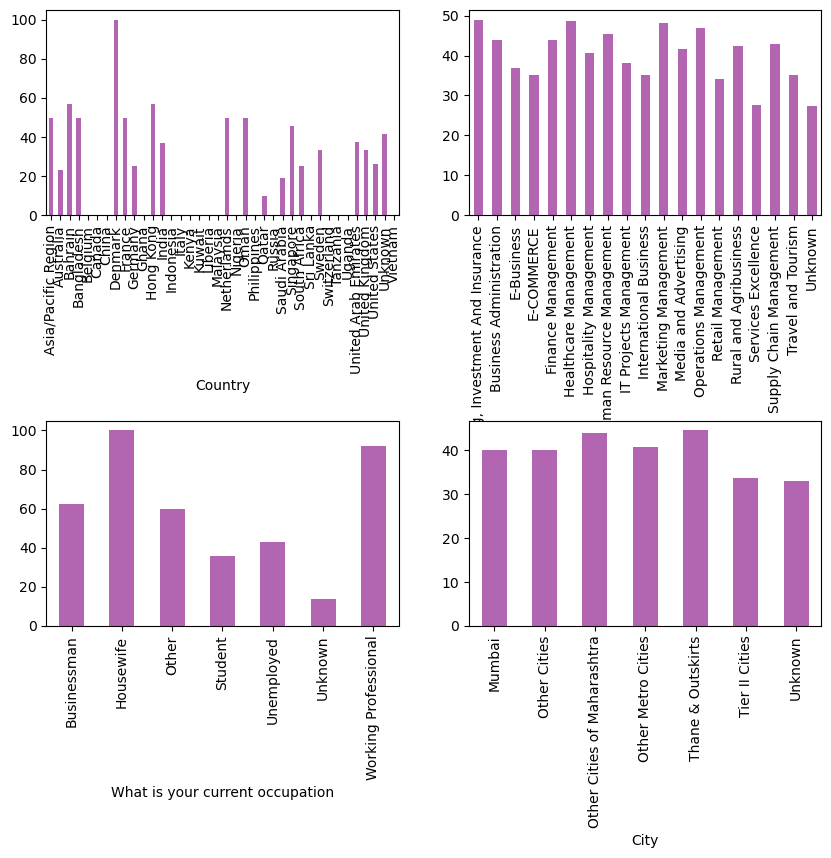

In [39]:
# Personal info

plt.figure(figsize = [10,8])
plt.subplots_adjust(hspace=1)
color = [0.5, 0, 0.5, 0.6]

plt.subplot(2,2,1)
(100* lead.groupby(lead['Country'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(2,2,2)
(100* lead.groupby(lead['Specialization'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(2,2,3)
(100* lead.groupby(lead['What is your current occupation'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(2,2,4)
(100* lead.groupby(lead['City'])['Converted'].mean()).plot.bar(color = color)

plt.show()

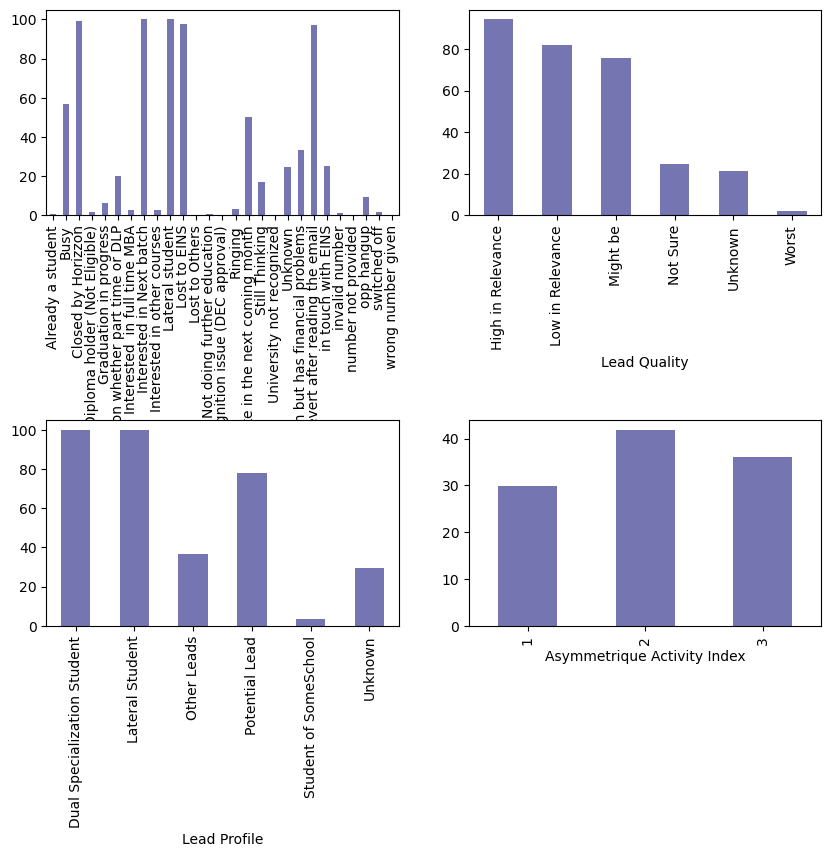

In [40]:
# Lead perception by company

plt.figure(figsize = [10,8])
plt.subplots_adjust(hspace=1)
color = [0.1, 0.1, 0.5, 0.6]

plt.subplot(2,2,1)
(100* lead.groupby(lead['Tags'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(2,2,2)
(100* lead.groupby(lead['Lead Quality'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(2,2,3)
(100* lead.groupby(lead['Lead Profile'])['Converted'].mean()).plot.bar(color = color)

plt.subplot(2,2,4)
(100* lead.groupby(lead['Asymmetrique Activity Index'])['Converted'].mean()).plot.bar(color = color)

plt.show()

## Treating categorical variables

In [41]:
objectcols = lead.loc [:, lead.dtypes == 'object']
objectcols  = list(objectcols.columns)
objectcols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [42]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 34 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 non-n

In [43]:
# As there are too many categories, there will be many dummy variables created, 
# so instead we are choosing to do one hot encoding. This reduces the number of variables for the model.

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in objectcols:
    lead[i] = label_encoder.fit_transform(lead[i])

lead.shape

(9074, 34)

## Train-Test Split

In [44]:
# Checking the Conversion Rate
convertion = round((sum(lead['Converted'])/lead.shape[0])*100,2)
convertion

37.86

We have almost 38% convertion rate

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = lead.drop([ 'Prospect ID', 'Lead Number', 'Converted'], axis =1)
y = lead['Converted']

In [47]:
# trian-teast split with 70% data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, random_state = 100)

In [48]:
X_train.shape

(6351, 31)

In [49]:
y_train.shape

(6351,)

# Modelling

### Feature scaling

In [50]:
# Import scaler from library
from sklearn.preprocessing import MinMaxScaler

In [51]:
# Instantiate the scaler
scaler = MinMaxScaler()

In [52]:
scaler.fit_transform

<bound method TransformerMixin.fit_transform of MinMaxScaler()>

In [53]:
# columns to scale using min max scaler -> numeric columns
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [54]:
# scaling number columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
3009,1,1,0,0,0.007968,0.178347,0.083333,5,12,4,8,5,3,0,0,0,0,0,0,0,0,18,4,0,0,5,0,3,0,1,4
1012,1,1,1,0,0.007968,0.085355,0.083333,2,12,18,8,6,3,0,0,0,0,0,0,0,0,18,4,0,0,5,0,2,0,0,1
9226,0,6,0,0,0.000000,0.000000,0.000000,12,36,18,8,4,0,0,0,0,0,0,0,0,0,14,3,0,0,5,6,1,0,0,8
4750,1,1,0,0,0.007968,0.619946,0.083333,12,12,10,2,5,3,0,0,0,0,0,0,0,0,18,4,0,0,5,1,3,0,0,12
7987,1,1,0,0,0.019920,0.711590,0.104167,12,12,4,9,4,0,0,0,0,0,0,0,0,0,10,3,0,0,5,2,2,0,0,8


In [55]:
import statsmodels.api as sm

In [56]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2314.8
Date:                Mon, 22 Jul 2024   Deviance:                       4629.7
Time:                        23:10:22   Pearson chi2:                 6.50e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4534
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9947      0.470     -8.498      0.000      -4.916      -3.073
Lead Origin                                       0.5043      0.081      6.253      0.000       0.346       0.662
Lead Source                                       0.1060      0.016      6.706      0.000       0.075       0.137
Do Not Email                                     -1.5006      0.181     -8.282      0.000      -1.856      -1.145
Do Not Call                                      20.4451   2.06e+04      0.001      0.999   -4.04e+04    4.05e+04
TotalVisits                                       6.9148      2.340      2.955      0.003       2.329      11.501
Total Time Spent on Website                       4.6632      0.184     25.335      0.000       4.302       5.024
Page Views Per Visit                             -3.3031      0.606     -5.451      0.000      -4.491      -2.116
Last Activity                                     0.0930      0.018      5.296      0.000       0.059       0.127
Country                                           0.0413      0.005      7.617      0.000       0.031       0.052
Specialization                                   -0.0100      0.009     -1.141      0.254      -0.027       0.007
How did you hear about X Education                0.0382      0.024      1.580      0.114      -0.009       0.086
What is your current occupation                   0.5368      0.079      6.799      0.000       0.382       0.692
What matters most to you in choosing a course    -0.4521      0.042    -10.837      0.000      -0.534      -0.370
Search                                           -0.7010      0.996     -0.703      0.482      -2.654       1.252
Magazine                                      -2.471e-10   2.93e-07     -0.001      0.999   -5.74e-07    5.74e-07
Newspaper Article                                20.2066   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                              -39.9790   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                       -23.4153   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                            -0.7962      2.167     -0.367      0.713      -5.044       3.451
Through Recommendations                           0.9648      2.169      0.445      0.656      -3.286       5.216
Receive More Updates About Our Courses          7.66e-12   1.27e-08      0.001      1.000   -2.49e-08    2.49e-08
Tags                                              0.0759      0.006     11.733      0.000       0.063       0.089
Lead Quality                                     -0.8320      0.039    -21.352      0.000      -0.908      -0.756
Updat

### Feature selection

In [57]:
# Instantiate the modeller 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [58]:
# Import RFE from sklearn as stats models wont work for RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)          # fit the data

In [59]:
# To get features that are important
rfe.support_

array([ True,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False,  True, False])

In [60]:
# list these features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', False, 3),
 ('Specialization', False, 3),
 ('How did you hear about X Education', False, 3),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', True, 1),
 ('Magazine', False, 3),
 ('Newspaper Article', False, 3),
 ('X Education Forums', False, 3),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', False, 3),
 ('Receive More Updates About Our Courses', False, 3),
 ('Tags', True, 1),
 ('Lead Quality', True, 1),
 ('Update me on Supply Chain Content', False, 3),
 ('Get updates on DM Content', False, 3),
 ('Lead Profile', True, 1),
 ('City', True, 1),
 ('Asymmetrique Activity Index', False, 2),
 ('I agree to pay the amount throu

In [61]:
# columns that are included
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Newspaper',
       'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [62]:
# colummns that are excluded
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Country', 'Specialization',
       'How did you hear about X Education', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Asymmetrique Activity Index',
       'I agree to pay the amount through cheque', 'Last Notable Activity'],
      dtype='object')

In [63]:
# define a function to run the model 

def logreg(train_set, columns):
    X_train_sm = sm.add_constant(X_train[col])                                # Adding constant 
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())        # Fit the model on data
    res = logm.fit()
    return res.summary()

#### Model 2

In [64]:
# Assessing model with stats model

logreg(X_train, col)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2354.0
Date:                Mon, 22 Jul 2024   Deviance:                       4708.0
Time:                        23:10:22   Pearson chi2:                 6.63e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4466
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9716      0.404     -7.364      0.000      -3.762      -2.181
Lead Origin                                       0.5162      0.077      6.722      0.000       0.366       0.667
Lead Source                                       0.1433      0.015      9.842      0.000       0.115       0.172
Do Not Email                                     -1.4468      0.179     -8.065      0.000      -1.798      -1.095
Total Time Spent on Website                       4.2492      0.170     24.929      0.000       3.915       4.583
Page Views Per Visit                             -4.7394      0.512     -9.249      0.000      -5.744      -3.735
Last Activity                                     0.1286      0.011     12.071      0.000       0.108       0.149
What is your current occupation                   0.5526      0.078      7.110      0.000       0.400       0.705
What matters most to you in choosing a course    -0.4393      0.041    -10.681      0.000      -0.520      -0.359
Search                                           -0.7508      0.914     -0.822      0.411      -2.542       1.040
Newspaper                                       -22.0948   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Tags                                              0.0742      0.006     11.644      0.000       0.062       0.087
Lead Quality                                     -0.8357      0.038    -21.802      0.000      -0.911      -0.761
Lead Profile                                     -0.1459      0.045     -3.273      0.001      -0.233      -0.059
City                                              0.0640      0.021      3.099      0.002       0.024       0.104
A free copy of Mastering The Interview           -0.2980      0.095     -3.139      0.002      -0.484      -0.112
=================================================================================================================
"""

Checking VIFs

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Define a function to check VIFs

def VIF(X_train, col):
    vif = pd.DataFrame()                   # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [67]:
VIF(X_train, col)

,Features,VIF
6,What is your current occupation,27.76
12,Lead Profile,24.22
11,Lead Quality,10.15
10,Tags,7.95
5,Last Activity,5.95
13,City,4.89
1,Lead Source,4.21
0,Lead Origin,3.52
4,Page Views Per Visit,2.96
3,Total Time Spent on Website,2.24


In [68]:
# delete column with high VIF (>10)
col = col.drop('What is your current occupation', 1)
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What matters most to you in choosing a course', 'Search', 'Newspaper',
       'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

#### Model 3

In [69]:
# next model

logreg(X_train, col)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2382.1
Date:                Mon, 22 Jul 2024   Deviance:                       4764.3
Time:                        23:10:23   Pearson chi2:                 6.58e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4417
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6175      0.239     -2.585      0.010      -1.086      -0.149
Lead Origin                                       0.5354      0.076      7.049      0.000       0.387       0.684
Lead Source                                       0.1427      0.015      9.837      0.000       0.114       0.171
Do Not Email                                     -1.4592      0.178     -8.210      0.000      -1.808      -1.111
Total Time Spent on Website                       4.2518      0.170     25.071      0.000       3.919       4.584
Page Views Per Visit                             -4.6728      0.507     -9.208      0.000      -5.667      -3.678
Last Activity                                     0.1300      0.011     12.298      0.000       0.109       0.151
What matters most to you in choosing a course    -0.2618      0.033     -8.017      0.000      -0.326      -0.198
Search                                           -0.6614      0.902     -0.734      0.463      -2.428       1.106
Newspaper                                       -22.1685   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Tags                                              0.0773      0.006     12.214      0.000       0.065       0.090
Lead Quality                                     -0.8760      0.038    -22.879      0.000      -0.951      -0.801
Lead Profile                                     -0.1590      0.044     -3.631      0.000      -0.245      -0.073
City                                              0.0701      0.021      3.416      0.001       0.030       0.110
A free copy of Mastering The Interview           -0.2978      0.094     -3.158      0.002      -0.483      -0.113
=================================================================================================================
"""

In [70]:
VIF(X_train, col)

,Features,VIF
11,Lead Profile,20.79
10,Lead Quality,9.95
9,Tags,7.15
5,Last Activity,5.80
12,City,4.63
1,Lead Source,4.10
0,Lead Origin,3.21
4,Page Views Per Visit,2.92
3,Total Time Spent on Website,2.15
13,A free copy of Mastering The Interview,2.02


In [71]:
# delete column with high VIF (>10)
col = col.drop('Lead Profile', 1)
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What matters most to you in choosing a course', 'Search', 'Newspaper',
       'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

#### Model 4

In [72]:
# builing a new model

logreg(X_train, col)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.7
Date:                Mon, 22 Jul 2024   Deviance:                       4777.4
Time:                        23:10:23   Pearson chi2:                 6.54e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4406
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1026      0.197     -5.585      0.000      -1.490      -0.716
Lead Origin                                       0.5330      0.075      7.069      0.000       0.385       0.681
Lead Source                                       0.1443      0.014      9.972      0.000       0.116       0.173
Do Not Email                                     -1.4659      0.177     -8.274      0.000      -1.813      -1.119
Total Time Spent on Website                       4.2609      0.169     25.140      0.000       3.929       4.593
Page Views Per Visit                             -4.7429      0.506     -9.379      0.000      -5.734      -3.752
Last Activity                                     0.1250      0.010     11.966      0.000       0.105       0.145
What matters most to you in choosing a course    -0.2742      0.032     -8.443      0.000      -0.338      -0.211
Search                                           -0.6810      0.906     -0.752      0.452      -2.457       1.095
Newspaper                                       -22.2622   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Tags                                              0.0758      0.006     12.038      0.000       0.063       0.088
Lead Quality                                     -0.9243      0.036    -25.391      0.000      -0.996      -0.853
City                                              0.0662      0.020      3.241      0.001       0.026       0.106
A free copy of Mastering The Interview           -0.2982      0.094     -3.168      0.002      -0.483      -0.114
=================================================================================================================
"""

In [73]:
VIF(X_train, col)

,Features,VIF
9,Tags,6.39
10,Lead Quality,6.10
5,Last Activity,5.45
11,City,4.41
1,Lead Source,4.07
0,Lead Origin,3.10
4,Page Views Per Visit,2.85
3,Total Time Spent on Website,2.11
12,A free copy of Mastering The Interview,2.00
6,What matters most to you in choosing a course,1.96


In [74]:
# delete column with high p value
col = col.drop('Newspaper', 1)
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview'],
      dtype='object')

#### Model 5

In [75]:
# builing a new model

logreg(X_train, col)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2390.5
Date:                Mon, 22 Jul 2024   Deviance:                       4781.1
Time:                        23:10:23   Pearson chi2:                 6.54e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4402
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0998      0.197     -5.572      0.000      -1.487      -0.713
Lead Origin                                       0.5284      0.075      7.013      0.000       0.381       0.676
Lead Source                                       0.1450      0.014     10.025      0.000       0.117       0.173
Do Not Email                                     -1.4645      0.177     -8.268      0.000      -1.812      -1.117
Total Time Spent on Website                       4.2489      0.169     25.100      0.000       3.917       4.581
Page Views Per Visit                             -4.7483      0.506     -9.392      0.000      -5.739      -3.757
Last Activity                                     0.1253      0.010     11.995      0.000       0.105       0.146
What matters most to you in choosing a course    -0.2736      0.032     -8.428      0.000      -0.337      -0.210
Search                                           -0.6779      0.906     -0.748      0.454      -2.454       1.098
Tags                                              0.0758      0.006     12.037      0.000       0.063       0.088
Lead Quality                                     -0.9239      0.036    -25.394      0.000      -0.995      -0.853
City                                              0.0646      0.020      3.166      0.002       0.025       0.105
A free copy of Mastering The Interview           -0.2956      0.094     -3.142      0.002      -0.480      -0.111
=================================================================================================================
"""

In [76]:
VIF(X_train, col)

,Features,VIF
8,Tags,6.39
9,Lead Quality,6.10
5,Last Activity,5.45
10,City,4.40
1,Lead Source,4.07
0,Lead Origin,3.10
4,Page Views Per Visit,2.85
3,Total Time Spent on Website,2.11
11,A free copy of Mastering The Interview,2.00
6,What matters most to you in choosing a course,1.96


In [77]:
# delete column with high p value
col = col.drop('Search', 1)
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'City', 'A free copy of Mastering The Interview'],
      dtype='object')

#### Model 6

In [78]:
# builing a new model

logreg(X_train, col)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2390.8
Date:                Mon, 22 Jul 2024   Deviance:                       4781.6
Time:                        23:10:23   Pearson chi2:                 6.54e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4402
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1036      0.197     -5.592      0.000      -1.490      -0.717
Lead Origin                                       0.5277      0.075      7.007      0.000       0.380       0.675
Lead Source                                       0.1451      0.014     10.032      0.000       0.117       0.173
Do Not Email                                     -1.4634      0.177     -8.263      0.000      -1.810      -1.116
Total Time Spent on Website                       4.2489      0.169     25.100      0.000       3.917       4.581
Page Views Per Visit                             -4.7586      0.505     -9.414      0.000      -5.749      -3.768
Last Activity                                     0.1253      0.010     12.001      0.000       0.105       0.146
What matters most to you in choosing a course    -0.2742      0.032     -8.447      0.000      -0.338      -0.211
Tags                                              0.0759      0.006     12.047      0.000       0.064       0.088
Lead Quality                                     -0.9228      0.036    -25.393      0.000      -0.994      -0.852
City                                              0.0643      0.020      3.152      0.002       0.024       0.104
A free copy of Mastering The Interview           -0.2953      0.094     -3.139      0.002      -0.480      -0.111
=================================================================================================================
"""

In [79]:
VIF(X_train, col)

,Features,VIF
7,Tags,6.39
8,Lead Quality,6.10
5,Last Activity,5.45
9,City,4.40
1,Lead Source,4.07
0,Lead Origin,3.10
4,Page Views Per Visit,2.84
3,Total Time Spent on Website,2.11
10,A free copy of Mastering The Interview,2.00
6,What matters most to you in choosing a course,1.96


#### Getting predicted values 

In [80]:
# For the final model 
X_train_sm = sm.add_constant(X_train[col])                                # Adding constant 
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())        # Fit the model on data
res = logm.fit()

In [81]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.052862
1012    0.007963
9226    0.487670
4750    0.556644
7987    0.848157
1281    0.925349
2880    0.039756
4971    0.415944
7536    0.985262
1248    0.662506
dtype: float64

In [82]:
# change shape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05286234, 0.00796317, 0.48767048, 0.55664359, 0.8481573 ,
       0.9253495 , 0.03975639, 0.41594406, 0.98526219, 0.6625063 ])

#### Creating a dataframe with the actual convert flag, lead score and the predicted probabilities

In [83]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred, 'Lead Score': y_train_pred*100})
y_train_pred_final ['Lead Score'] = round(y_train_pred_final ['Lead Score'])
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final = y_train_pred_final.reindex(columns=['Lead Number','Convert','Convert_Prob', 'Lead Score'])
y_train_pred_final.head()

,Lead Number,Convert,Convert_Prob,Lead Score
0,3009,0,0.052862,5.0
1,1012,0,0.007963,1.0
2,9226,0,0.487670,49.0
3,4750,1,0.556644,56.0
4,7987,1,0.848157,85.0


In [84]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead Number,Convert,Convert_Prob,Lead Score,Predicted
0,3009,0,0.052862,5.0,0
1,1012,0,0.007963,1.0,0
2,9226,0,0.487670,49.0,0
3,4750,1,0.556644,56.0,1
4,7987,1,0.848157,85.0,1


### Assessing model through metrics

In [85]:
from sklearn import metrics

In [86]:
# Accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

0.8373484490631397


In [87]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
print(confusion)

[[3485  420]
 [ 613 1833]]


#### ROC Curve

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Sensitivity
TP / float(TP+FN)

0.7493867538838921

In [91]:
# Specificity
TN / float(TN+FP)

0.8924455825864277

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

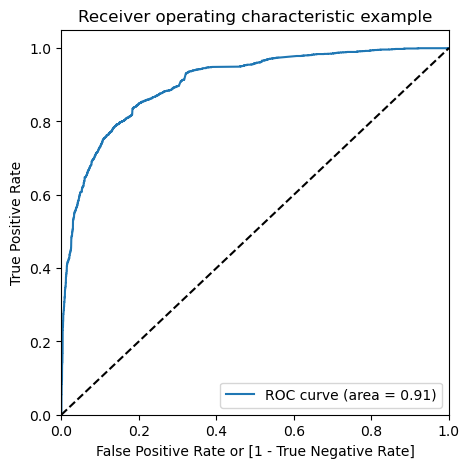

In [94]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

#### Finding Optimal Cutoff Point

In [95]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Convert,Convert_Prob,Lead Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3009,0,0.052862,5.0,0,1,0,0,0,0,0,0,0,0,0
1,1012,0,0.007963,1.0,0,1,0,0,0,0,0,0,0,0,0
2,9226,0,0.487670,49.0,0,1,1,1,1,1,0,0,0,0,0
3,4750,1,0.556644,56.0,1,1,1,1,1,1,1,0,0,0,0
4,7987,1,0.848157,85.0,1,1,1,1,1,1,1,1,1,1,0


In [96]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.663045     0.967294     0.472471
0.2          0.2  0.780979     0.890025     0.712676
0.3          0.3  0.817509     0.850777     0.796671
0.4          0.4  0.829476     0.796811     0.849936
0.5          0.5  0.837348     0.749387     0.892446
0.6          0.6  0.832782     0.689697     0.922407
0.7          0.7  0.818296     0.612428     0.947247
0.8          0.8  0.790269     0.501226     0.971319
0.9          0.9  0.743033     0.349959     0.989245


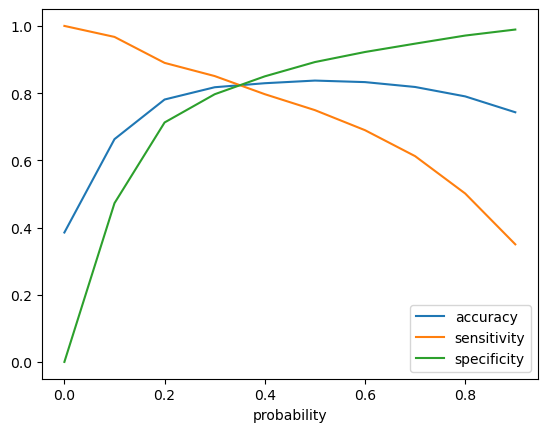

In [97]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Lead Number,Convert,Convert_Prob,Lead Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,3009,0,0.052862,5.0,0,1,0,0,0,0,0,0,0,0,0,0
1,1012,0,0.007963,1.0,0,1,0,0,0,0,0,0,0,0,0,0
2,9226,0,0.487670,49.0,0,1,1,1,1,1,0,0,0,0,0,1
3,4750,1,0.556644,56.0,1,1,1,1,1,1,1,0,0,0,0,1
4,7987,1,0.848157,85.0,1,1,1,1,1,1,1,1,1,1,0,1


In [99]:
# check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8186112423240435

Overall accuracy has dropped a bit from 83% to 81%

In [100]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3206,  699],
       [ 453, 1993]])

In [101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Sensitivity
TP / float(TP+FN)

0.8147996729354048

Sensitivity has increased from 75% to 81%

In [103]:
# Specificity
TN / float(TN+FP)

0.8209987195902689

Specificity has dropped from 89% to 82%

#### Precision and recall tradeoff

##### Precision
TP / TP + FP

In [104]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7403417533432393

##### Recall
TP / TP + FN

In [105]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8147996729354048

In [106]:
from sklearn.metrics import precision_recall_curve

In [107]:
y_train_pred_final.Convert, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Convert, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [108]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

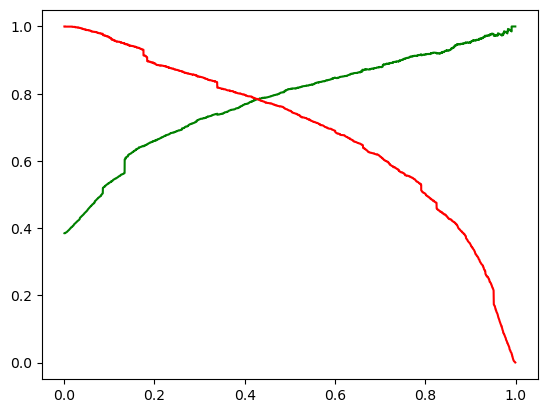

In [109]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Precision: Of those detected as converting lead, how many actually converted

Recall: Of who converted, how many did the model actually predict

We want to detect as many potential conversion lead, so we prioritise recall over precision. 

As per the graph above reducing cut off threshold will increase recall.

In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Lead Number,Convert,Convert_Prob,Lead Score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,3009,0,0.052862,5.0,0,1,0,0,0,0,0,0,0,0,0,0
1,1012,0,0.007963,1.0,0,1,0,0,0,0,0,0,0,0,0,0
2,9226,0,0.487670,49.0,0,1,1,1,1,1,0,0,0,0,0,1
3,4750,1,0.556644,56.0,1,1,1,1,1,1,1,0,0,0,0,1
4,7987,1,0.848157,85.0,1,1,1,1,1,1,1,1,1,1,0,1


In [111]:
# check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.817509053692332

Overall accuracy hasn't changed

In [112]:
# Confusion metrics
confusion3 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted)
confusion3

array([[3111,  794],
       [ 365, 2081]])

In [113]:
# Precision
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.7238260869565217

Precision has decreased from 76% to 72%

In [114]:
# Recall
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8507767784137367

Recall has increased from 79% to 85%

# Making Predictions

In [115]:
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
3271,0,3,0,0,0.054054,0.069102,0.072727,5,12,18,8,5,3,0,0,0,0,0,0,0,0,18,4,0,0,5,6,3,0,0,4
1490,1,1,0,0,0.067568,0.665933,0.090909,5,12,11,8,6,0,0,0,0,0,0,0,0,0,20,1,0,0,3,0,2,0,1,4
7936,0,3,0,0,0.027027,0.032570,0.036364,5,12,18,8,5,3,0,0,0,0,0,0,0,0,18,4,0,0,5,6,1,0,0,4
4216,2,10,0,0,0.000000,0.000000,0.000000,5,36,3,8,3,0,0,0,0,0,0,0,0,0,2,1,0,0,2,0,2,0,0,8
3830,1,7,0,0,0.108108,0.072183,0.145455,5,12,13,8,5,3,0,0,0,0,0,0,0,0,18,4,0,0,5,1,3,0,1,4


In [116]:
X_test = X_test[col]

In [117]:
X_test_sm = sm.add_constant(X_test)

In [118]:
X_test_sm.shape

(2723, 12)

In [119]:
y_test.shape

(2723,)

In [120]:
# Getting the predicted values on the test set
y_test_pred = res.predict(X_test_sm)

In [121]:
# Convert y_test_pred array to dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

,0
3271,0.054366
1490,0.947472
7936,0.055290
4216,0.778741
3830,0.063108
...,...
850,0.115308
2879,0.077679
6501,0.905049
7155,0.077332


In [122]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [123]:
# Adding Lead Number to index
y_test_df['Lead Number'] = y_test_df.index
y_test_df.head()

,Converted,Lead Number
3271,0,3271
1490,1,1490
7936,0,7936
4216,1,4216
3830,0,3830


In [124]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [126]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.054366
1,1,1490,0.947472
2,0,7936,0.055290
3,1,4216,0.778741
4,0,3830,0.063108


In [127]:
# Renaming the column 
y_pred_final = y_pred_final.rename(columns={0 : 'Convert_Prob'})

# Adding Lead Score to dataframe
y_pred_final['Lead Score'] = round (y_pred_final['Convert_Prob']*100)

y_pred_final.head()

,Converted,Lead Number,Convert_Prob,Lead Score
0,0,3271,0.054366,5.0
1,1,1490,0.947472,95.0
2,0,7936,0.055290,6.0
3,1,4216,0.778741,78.0
4,0,3830,0.063108,6.0


In [128]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [129]:
y_pred_final.head()

,Converted,Lead Number,Convert_Prob,Lead Score,final_predicted
0,0,3271,0.054366,5.0,0
1,1,1490,0.947472,95.0,1
2,0,7936,0.055290,6.0,0
3,1,4216,0.778741,78.0,1
4,0,3830,0.063108,6.0,0


## Comparing model result on train and test sets

In [130]:
# Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7976496511200881

Accuracy on train set was 81% while on test set is 79.7%, - very similar

In [131]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1316,  418],
       [ 133,  856]])

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Precision
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.6718995290423861

Precision has dropped from 72% to 67%

In [134]:
# Recall
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.865520728008089

Recall is still greater than 85% on test set, like on train set